In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd

In [2]:
true_poa_geo = gpd.read_file("Predictions\\true_poa.geojson")
pred_sa1_geo = gpd.read_file("Predictions\pred_sa1.geojson")
pred_sa2_geo = gpd.read_file("Predictions\pred_sa2.geojson")
pred_sa3_geo = gpd.read_file("Predictions\pred_sa3.geojson")
pred_ag_poa_geo = gpd.read_file("Predictions\pred_ag_poa.geojson")
pred_poa_geo = gpd.read_file("Predictions\pred_poa.geojson")
pred_lga_geo = gpd.read_file("Predictions\pred_lga.geojson")

In [3]:
def TRS(initial_weights):
    # Desired total constraint
    desired_total = sum(initial_weights)

    # Step 1: Truncate the weights to integers
    truncated_weights = np.floor(initial_weights).astype(int)

    # Step 2: Calculate the discrepancy
    total_truncated = np.sum(truncated_weights)
    discrepancy = desired_total - total_truncated

    # Step 3: Replicate individuals to match the constraint
    if discrepancy > 0:
        # Calculate fractional parts
        fractional_parts = initial_weights - truncated_weights
        
        # Replicate individuals in proportion to their fractional parts
        replication_probs = fractional_parts / np.sum(fractional_parts)
        num_replications = np.random.multinomial(discrepancy, replication_probs)
        truncated_weights += num_replications

    # Step 4: Sample individuals if there is an excess
    if discrepancy < 0:
        excess_indices = np.where(truncated_weights > 0)[0]
        excess_weights = truncated_weights[excess_indices]
        
        # Calculate sampling probabilities based on truncated weights
        sampling_probs = excess_weights / np.sum(excess_weights)
        
        # Randomly sample individuals to reduce excess
        num_samples = np.random.multinomial(abs(discrepancy), sampling_probs)
        truncated_weights[excess_indices] -= num_samples

    # Step 5: Your final truncated and rounded integer weights
    return truncated_weights

In [6]:
array = pred_sa1_geo["pred_evs"]
pred_sa1_geo["int_evs"] = TRS(array)
print(f"Total pred: {sum(pred_sa1_geo['pred_evs'])}, Total int: {sum(pred_sa1_geo['int_evs'])}")

array = pred_ag_poa_geo["pred_evs"]
pred_ag_poa_geo["int_evs"] = TRS(array)
print(f"Total pred: {sum(pred_ag_poa_geo['pred_evs'])}, Total int: {sum(pred_ag_poa_geo['int_evs'])}")

array = pred_poa_geo["pred_evs"]
pred_poa_geo["int_evs"] = TRS(array)
print(f"Total pred: {sum(pred_poa_geo['pred_evs'])}, Total int: {sum(pred_poa_geo['int_evs'])}")

Total pred: 5872.409891461022, Total int: 5872
Total pred: 6025.809200586053, Total int: 6025
Total pred: 5394.573652498, Total int: 5394


<Axes: >

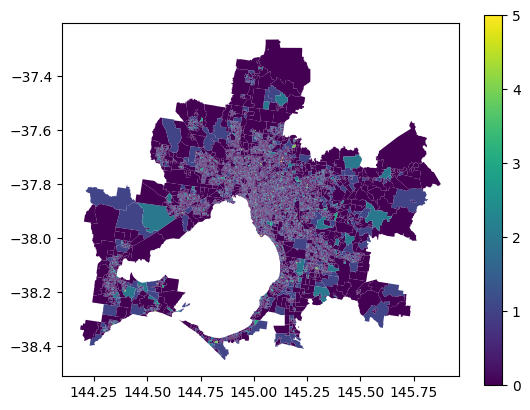

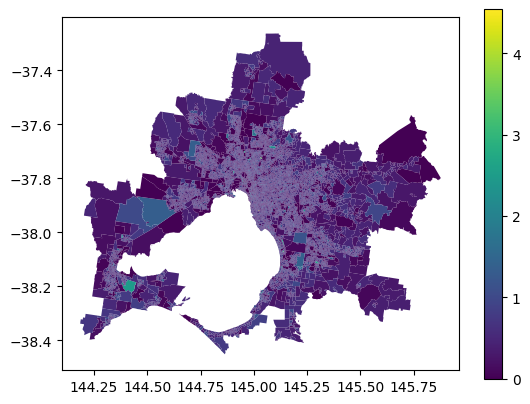

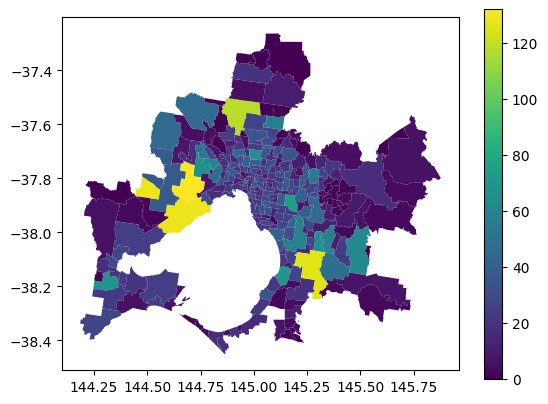

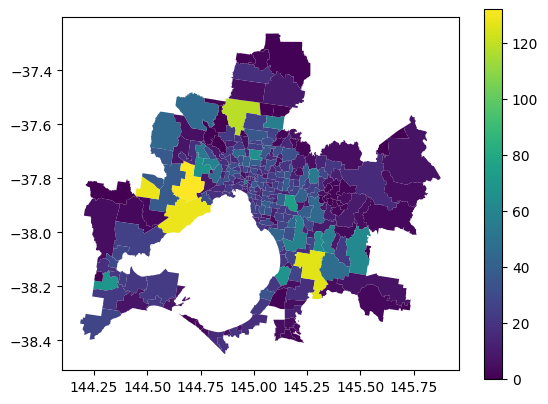

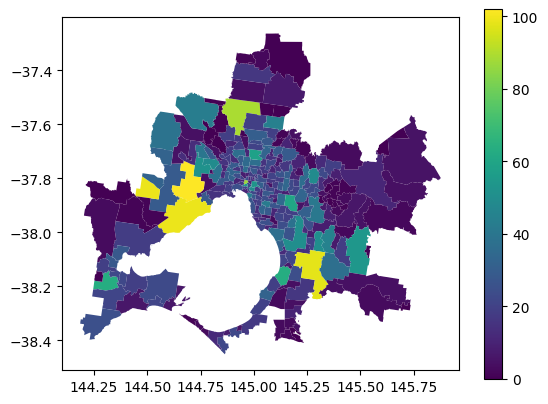

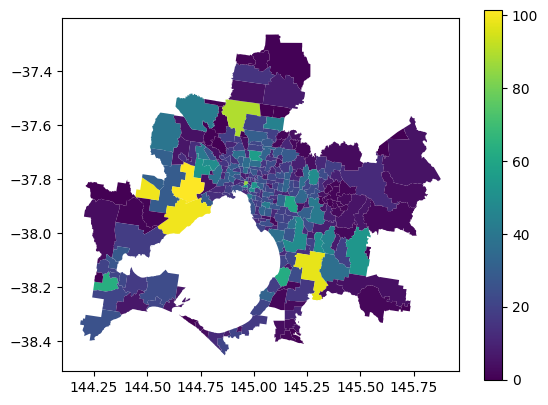

In [7]:
pred_sa1_geo.plot(column="int_evs", cmap='viridis', legend=True)
pred_sa1_geo.plot(column="pred_evs", cmap='viridis', legend=True)

pred_ag_poa_geo.plot(column="int_evs", cmap='viridis', legend=True)
pred_ag_poa_geo.plot(column="pred_evs", cmap='viridis', legend=True)

pred_poa_geo.plot(column="int_evs", cmap='viridis', legend=True)
pred_poa_geo.plot(column="pred_evs", cmap='viridis', legend=True)

In [8]:
pred_sa1_geo.to_file("Assigned_Pop\pred_sa1_geo.geojson", driver='GeoJSON')
pred_ag_poa_geo.to_file("Assigned_Pop\pred_ag_poa_geo.geojson", driver='GeoJSON')
pred_poa_geo.to_file("Assigned_Pop\pred_poa_geo.geojson", driver='GeoJSON')